In [108]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:
#Import the libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',1000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

from imblearn.over_sampling import ADASYN
from collections import Counter

In [110]:
#Read the train and test dataset
df_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fraudTrain.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fraudTest.csv')

In [111]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [112]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Performing the Exploratory Data Analysis (EDA)


In [113]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [115]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [116]:
#Drop the unnamed column
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)

In [117]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [118]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [119]:
# Convert the 'trans_date_trans_time' column to datetime format
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])

# Extract the date part from 'trans_date_trans_time' and convert it to datetime format
df_train['trans_date'] = df_train['trans_date_trans_time'].dt.date
df_test['trans_date'] = df_test['trans_date_trans_time'].dt.date

# Convert the 'trans_date' column to datetime format
df_train['trans_date'] = pd.to_datetime(df_train['trans_date'])
df_test['trans_date'] = pd.to_datetime(df_test['trans_date'])

# Convert the 'dob' column to datetime format
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_test['dob'] = pd.to_datetime(df_test['dob'])


In [120]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [121]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21


In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [124]:
#Drop the fields that are not necessary for model building
drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']
df_train1 = df_train.drop(drop_cols,axis=1)
df_test1 = df_test.drop(drop_cols,axis=1)

In [125]:
# Drop the unnecessary columns using a loop
df_train1 = df_train.copy()
df_test1 = df_test.copy()

for col in ['cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time']:
 df_train1.drop(columns=[col], inplace=True)
 df_test1.drop(columns=[col], inplace=True)

In [126]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [127]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

<ipython-input-128-44a37764658d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Fraud', 'Fraud'], y=df_train1['is_fraud'].value_counts(), palette=['yellow', 'blue'])
<ipython-input-128-44a37764658d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Fraud', 'Fraud'], y=df_test1['is_fraud'].value_counts(), palette=['yellow', 'blue'])


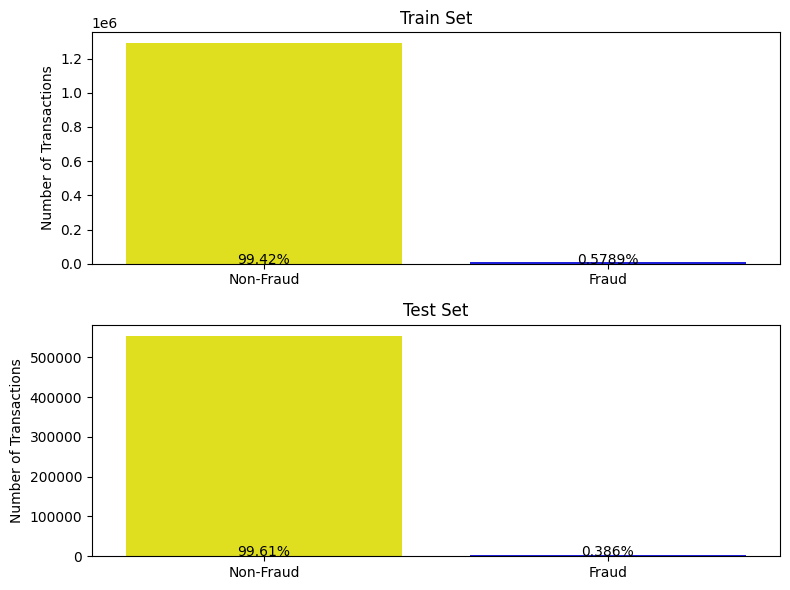

In [128]:
#Checking class imbalance using a different approach
train_class_counts = df_train1['is_fraud'].value_counts(normalize=True) * 100
test_class_counts = df_test1['is_fraud'].value_counts(normalize=True) * 100

#Plotting class distribution for the training set
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
sns.barplot(x=['Non-Fraud', 'Fraud'], y=df_train1['is_fraud'].value_counts(), palette=['yellow', 'blue'])
plt.title('Train Set')
plt.ylabel('Number of Transactions')
plt.annotate(f"{train_class_counts[0]:.4}%", (0, train_class_counts[0] / 2), ha='center', color='black')
plt.annotate(f"{train_class_counts[1]:.4}%", (1, train_class_counts[1] / 2), ha='center', color='black')

#Plotting class distribution for the test set
plt.subplot(2, 1, 2)
sns.barplot(x=['Non-Fraud', 'Fraud'], y=df_test1['is_fraud'].value_counts(), palette=['yellow', 'blue'])
plt.title('Test Set')
plt.ylabel('Number of Transactions')
plt.annotate(f"{test_class_counts[0]:.4}%", (0, test_class_counts[0] / 2), ha='center', color='black')
plt.annotate(f"{test_class_counts[1]:.4}%", (1, test_class_counts[1] / 2), ha='center', color='black')

plt.tight_layout()
plt.show()


In [129]:
# Creating the 'age_at_trans' field using a different approach
df_train1['age_at_trans'] = df_train1['trans_date'].dt.year - df_train1['dob'].dt.year
df_train1['age_at_trans'] -= ((df_train1['trans_date'].dt.month < df_train1['dob'].dt.month) |
                              ((df_train1['trans_date'].dt.month == df_train1['dob'].dt.month) &
                               (df_train1['trans_date'].dt.day < df_train1['dob'].dt.day))).astype(int)

df_test1['age_at_trans'] = df_test1['trans_date'].dt.year - df_test1['dob'].dt.year
df_test1['age_at_trans'] -= ((df_test1['trans_date'].dt.month < df_test1['dob'].dt.month) |
                             ((df_test1['trans_date'].dt.month == df_test1['dob'].dt.month) &
                              (df_test1['trans_date'].dt.day < df_test1['dob'].dt.day))).astype(int)

In [130]:
df_train1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32


In [131]:
df_test1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,52
1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,30
2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,49
3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,32
4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,64


In [132]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [133]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [134]:
#Create a DataFrame for fraud cases grouped by city
fraud_city = df_train1[df_train1['is_fraud'] == 1].groupby('city').size().reset_index(name='is_fraud')
fraud_city = fraud_city.set_index('city')
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [135]:
#Create a DataFrame for fraud cases grouped by state
fraud_state = df_train1[df_train1['is_fraud'] == 1].groupby('state').size().reset_index(name='is_fraud')
fraud_state = fraud_state.set_index('state')
fraud_state.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [136]:
#Create a DataFrame for fraud cases grouped by job
fraud_job = df_train1[df_train1['is_fraud'] == 1]['job'].value_counts().reset_index(name='is_fraud')
fraud_job = fraud_job.set_index('job')
fraud_job.index

Index(['Materials engineer', 'Trading standards officer', 'Naval architect',
       'Exhibition designer', 'Surveyor, land/geomatics',
       'Mechanical engineer', 'Prison officer', 'Quantity surveyor',
       'Audiological scientist', 'Senior tax professional/tax inspector',
       ...
       'Local government officer', 'Interpreter',
       'Designer, exhibition/display', 'Corporate investment banker',
       'Pension scheme manager', 'Statistician', 'Health physicist',
       'Chartered loss adjuster', 'English as a second language teacher',
       'Contractor'],
      dtype='object', name='job', length=443)

In [137]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude
df_train1['lat_dist'] = (df_train1['merch_lat'] - df_train1['lat']).abs().round(3)
df_train1['long_dist'] = (df_train1['merch_long'] - df_train1['long']).abs().round(3)

df_test1['lat_dist'] = (df_test1['merch_lat'] - df_test1['lat']).abs().round(3)
df_test1['long_dist'] = (df_test1['merch_long'] - df_test1['long']).abs().round(3)

df_train1[['merch_lat', 'lat', 'lat_dist', 'merch_long', 'long', 'long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [138]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [139]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [140]:
# Creating the month column using a different approach
df_train1['trans_month'] = df_train1['trans_date'].dt.month
df_test1['trans_month'] = df_test1['trans_date'].dt.month

df_train1[['trans_date_trans_time', 'trans_month']].head()

,trans_date_trans_time,trans_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [141]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [142]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [143]:
df_train1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [144]:
df_test1.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_month                   7
dtype: int64

Check if there are highly skewed categorical variables

In [145]:
#Calculate the percentage distribution and round to two decimal places
category_counts = df_train1['category'].value_counts()
category_percentages = (category_counts / len(df_train1)) * 100
rounded_percentages = category_percentages.round(2)
rounded_percentages

category
gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: count, dtype: float64

In [146]:
#Calculate the percentage distribution of the 'gender' column and round to two decimal places
gender_counts = df_train1['gender'].value_counts()
total_count = len(df_train1)
gender_percentages = (gender_counts / total_count * 100).round(2)
gender_percentages

gender
F    54.74
M    45.26
Name: count, dtype: float64

In [147]:
#Calculate the percentage distribution of the 'city' column and round to two decimal places
city_counts = df_train1['city'].value_counts()
total_entries = df_train1.shape[0]
city_percentages = (city_counts / total_entries * 100).round(2)
city_percentages

city
Birmingham                   0.43
San Antonio                  0.40
Utica                        0.39
Phoenix                      0.39
Meridian                     0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.36
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.31
Brandon                      0.31
Fulton                       0.31
Lahoma                       0.28
Allentown                    0.28
Lakeland                     0.28
Dallas                       0.28
Washington                   0.28
Andrews                      0.28
Detroit                      0.28
Huntsville                   0.27
Hudson                       0.27
Orient                       0.27
Fort Washakie                0.27
Philadelphia                 0.27
Uledi                        0.24
Elberta  

In [148]:
#Calculate the percentage distribution of the 'state' column and round to two decimal places
state_counts = df_train1['state'].value_counts()
total_count = df_train1.shape[0]
state_percentages = (state_counts / total_count * 100).round(2)
state_percentages

state
TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: count, dtype: float64

In [149]:
#Calculate the percentage distribution of the 'job' column and round to two decimal places
job_counts = df_train1['job'].value_counts()
total_jobs = df_train1['job'].size
job_percentages = (job_counts / total_jobs * 100).round(2)
job_percentages

job
Film/video editor                                              0.75
Exhibition designer                                            0.71
Naval architect                                                0.67
Surveyor, land/geomatics                                       0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.63
Systems developer                                              0.59
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.58
Chartered public finance accountant                            0.56
Scientist, audiological                                        0.55
Chief Executive Officer                                        0.55
Copywriter, advertising                                        0.55
Comptroller                                 

In [150]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [151]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [152]:
df_train1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [153]:
df_test1.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
lat_dist                   1001
long_dist                  1001
trans_month                   7
dtype: int64

In [154]:
#Drop the variables that are not useful for model building
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date']

df_train2 = df_train1.drop(drop_cols,axis=1)
df_test2 = df_test1.drop(drop_cols,axis=1)

In [155]:
df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32,0.254,0.830,1


In [156]:
df_test2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,personal_care,2.86,M,SC,333497,0,52,0.020,0.265,6
1,personal_care,29.84,F,UT,302,0,30,0.870,0.476,6
2,health_fitness,41.28,F,NY,34496,0,49,0.177,0.660,6
3,misc_pos,60.05,M,FL,54767,0,32,0.243,0.064,6
4,travel,3.19,M,MI,1126,0,64,0.706,0.868,6


In [157]:
#Binary mapping on Gender using a lambda function
df_train2['gender'] = df_train2['gender'].apply(lambda x: 1 if x == 'M' else 0)
df_test2['gender'] = df_test2['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [158]:
df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,NC,3495,0,30,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32,0.254,0.830,1


In [159]:
df_test2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,lat_dist,long_dist,trans_month
0,personal_care,2.86,1,SC,333497,0,52,0.020,0.265,6
1,personal_care,29.84,0,UT,302,0,30,0.870,0.476,6
2,health_fitness,41.28,0,NY,34496,0,49,0.177,0.660,6
3,misc_pos,60.05,1,FL,54767,0,32,0.243,0.064,6
4,travel,3.19,1,MI,1126,0,64,0.706,0.868,6


In [160]:
df_train2[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549688e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739702e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [161]:
#Create the dummy variables for Category using a different method
df_train3 = df_train2.copy()
df_test3 = df_test2.copy()

#One-hot encoding for the 'category' column
df_train3 = pd.concat([df_train3, pd.get_dummies(df_train3['category'], prefix='category', drop_first=True)], axis=1)
df_test3 = pd.concat([df_test3, pd.get_dummies(df_test3['category'], prefix='category', drop_first=True)], axis=1)

#Drop the original 'category' column
df_train3 = df_train3.drop(columns=['category'])
df_test3 = df_test3.drop(columns=['category'])

In [162]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  int64  
 6   lat_dist                 1296675 non-null  float64
 7   long_dist                1296675 non-null  float64
 8   trans_month              1296675 non-null  int32  
 9   category_food_dining     1296675 non-null  bool   
 10  category_gas_transport   1296675 non-null  bool   
 11  category_grocery_net     1296675 non-null  bool   
 12  category_grocery_pos     1296675 non-null  bool   
 13  category_health_fitness  1296675 non-null 

In [163]:
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   state                    555719 non-null  object 
 3   city_pop                 555719 non-null  int64  
 4   is_fraud                 555719 non-null  int64  
 5   age_at_trans             555719 non-null  int64  
 6   lat_dist                 555719 non-null  float64
 7   long_dist                555719 non-null  float64
 8   trans_month              555719 non-null  int32  
 9   category_food_dining     555719 non-null  bool   
 10  category_gas_transport   555719 non-null  bool   
 11  category_grocery_net     555719 non-null  bool   
 12  category_grocery_pos     555719 non-null  bool   
 13  category_health_fitness  555719 non-null  bool   
 14  cate

Building the model

In [164]:
#Dropping State
df_train4 = df_train3.drop('state',axis=1)
df_test4 = df_test3.drop('state',axis=1)

In [165]:
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  int64  
 5   lat_dist                 1296675 non-null  float64
 6   long_dist                1296675 non-null  float64
 7   trans_month              1296675 non-null  int32  
 8   category_food_dining     1296675 non-null  bool   
 9   category_gas_transport   1296675 non-null  bool   
 10  category_grocery_net     1296675 non-null  bool   
 11  category_grocery_pos     1296675 non-null  bool   
 12  category_health_fitness  1296675 non-null  bool   
 13  category_home            1296675 non-null 

In [166]:
df_test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   city_pop                 555719 non-null  int64  
 3   is_fraud                 555719 non-null  int64  
 4   age_at_trans             555719 non-null  int64  
 5   lat_dist                 555719 non-null  float64
 6   long_dist                555719 non-null  float64
 7   trans_month              555719 non-null  int32  
 8   category_food_dining     555719 non-null  bool   
 9   category_gas_transport   555719 non-null  bool   
 10  category_grocery_net     555719 non-null  bool   
 11  category_grocery_pos     555719 non-null  bool   
 12  category_health_fitness  555719 non-null  bool   
 13  category_home            555719 non-null  bool   
 14  cate

In [167]:
#Splitting train and test dataset into X and y
X_train = df_train4.drop(['is_fraud'],axis=1)
y_train = df_train4['is_fraud']

X_test = df_test4.drop(['is_fraud'],axis=1)
y_test = df_test4['is_fraud']

Oversample the data to compensate for the high class imbalance in the data

In [168]:
#Using ADASYN to oversample
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288749)]


Random Forest Model

In [169]:
#Initialize the RandomForestClassifier with the same parameters
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,
    max_features=12,
    min_samples_leaf=100,
    random_state=100,
    oob_score=True
)

In [170]:
rf.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [171]:
rf.oob_score_

0.9082996433556071

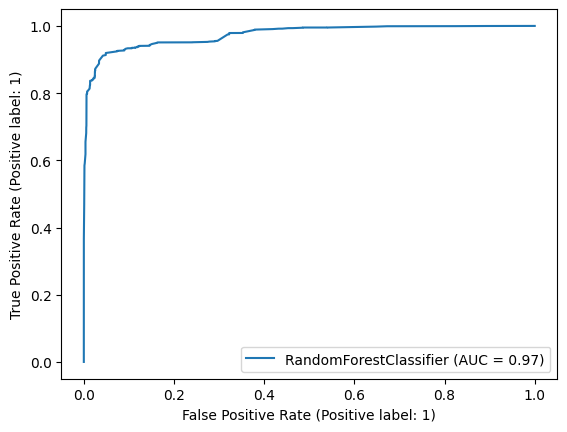

In [172]:
RocCurveDisplay.from_estimator(rf, X_train_res, y_train_res)
plt.show()

In [173]:
#Create a DataFrame for feature importances using a different approach
importances = rf.feature_importances_
feature_names = X_train.columns

#Create the DataFrame
imp_df = pd.DataFrame({
    "Varname": feature_names,
    "Imp": importances
})

In [174]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,7.131935e-01
8,category_gas_transport,1.298897e-01
10,category_grocery_pos,4.669501e-02
17,category_shopping_net,2.575160e-02
13,category_kids_pets,1.916519e-02
16,category_personal_care,1.695169e-02
14,category_misc_net,1.263626e-02
15,category_misc_pos,9.872540e-03
19,category_travel,8.839014e-03
7,category_food_dining,4.999896e-03


In [175]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [176]:
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92   1289169
           1       0.97      0.85      0.91   1288749

    accuracy                           0.91   2577918
   macro avg       0.92      0.91      0.91   2577918
weighted avg       0.92      0.91      0.91   2577918



Prediction on test

In [177]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [178]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.12      0.81      0.22      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.90      0.60    555719
weighted avg       1.00      0.98      0.99    555719



Test the model without oversampling

In [179]:
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
dtype: int64

In [180]:
df_train.shape

(1296675, 23)

In [181]:
#Create a subset of df_train using a different method
df_train_merge = df_train.loc[:, ['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud']]

In [182]:
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [183]:
#Create a dataframe of y_train_pred
df_train_pred = pd.DataFrame(y_train_pred)

In [184]:
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [185]:
#Merge the two DataFrames using join
df_train_final = df_train_merge.join(df_train_pred)

In [186]:
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [187]:
#Renaming column
df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})

In [188]:
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [189]:
print(df_train_final.columns)

Index(['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud',
       'is_fraud_pred'],
      dtype='object')


In [190]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [191]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1261244
1      35431
Name: is_fraud_pred, dtype: int64

In [192]:
#Create a subset of df_test using a different method
df_test_merge = df_test.loc[:, ['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud']]

In [193]:
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [194]:
#Creating dataframe of y_test_pred
df_test_pred = pd.DataFrame(y_test_pred)

In [195]:
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [196]:
#Merge the two DataFrames using a different method
df_test_final = df_test_merge.join(df_test_pred)

In [197]:
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [198]:
#Rename the column
df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})

In [199]:
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [200]:
print(df_test_final.columns)

Index(['trans_date_trans_time', 'amt', 'trans_num', 'is_fraud',
       'is_fraud_pred'],
      dtype='object')


In [201]:
#Count occurrences of 'is_fraud' using value_counts
df_test_final['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [202]:
df_test_final['is_fraud_pred'].value_counts()

is_fraud_pred
0    541652
1     14067
Name: count, dtype: int64

In [203]:
#Concatenate train and test datasets using a different method
df_merge_final = pd.concat([df_train_final, df_test_final], ignore_index=True)

In [204]:
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [205]:
df_merge_final.shape

(1852394, 5)

Cost Benefit Analysis

In [206]:
#Creating month and year columns
df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year

In [207]:
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [208]:
#Group by variable creation
g = df_merge_final.groupby(["year","month"])

In [209]:
#Number of transactions per month
g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [210]:
#Average number of transactions per month
df_merge_final.trans_num.count()/24

77183.08333333333

In [211]:
#Average Number of fraudulent transactions per month
df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24

402.125

In [212]:
#Average amount per fraud transaction
df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

530.661412288882

In [213]:
#Average number of transactions per month detected as fraud by the model
df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

2062.4166666666665

In [214]:
#Average number of transactions per month that are fraudulent but are not detected by the model
Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

67.25